In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
hostnames=[]
dataset=[]
df=None


In [3]:
#Crear una función para generar los hostnames en base a unas reglas

def set_hostnames(number_of_hosts:int) ->None:
  host_os=["L"]*40+["S"]*30+["A"]*20+["H"]*10 #Linux: 40% Solaris: 30% AIX: 20% HP-UX: 10%
  host_entorno=["D"]*10+["I"]*10+["T"]*25+["S"]*25+["P"]*30 #Development: 10% Integration: 10% Testing: 25% Staging: 25% Production: 30%
  host_pais=["NOR"]*6+["FRA"]*9+["ITA"]*16+["ESP"]*16+["DEU"]*23+["IRL"]*30 #Norway: 6% France: 9% Italy: 16% Spain: 16% Germany: 23% Ireland: 30%
  digitos_numericos=[]

  for i in range(number_of_hosts):
    letras=random.choice(host_os)+random.choice(host_entorno)+random.choice(host_pais)
    digitos_numericos.append(letras)
    letras+=str(digitos_numericos.count(letras)).zfill(3)
    hostnames.append(letras)



In [4]:
#Crear una función para obtener el nombre del SO.

def get_os(hostname:str) ->str:
  if hostname.startswith("L"):
    return "Linux"
  elif hostname.startswith("S"):
    return "Solaris"
  elif hostname.startswith("A"):
    return "AIX"
  elif hostname.startswith("H"):
    return "HP-UX"
  else:
    return "Unknow"



In [5]:
#Crear una función para obtener el nombre del entorno.

def get_enviroment(hostname:str) ->str:
  if hostname[1]=="D":
    return "Developmente"
  elif hostname[1]=="I":
    return "Integration"
  elif hostname[1]=="T":
    return "Testing"
  elif hostname[1]=="S":
    return "Staging"
  elif hostname[1]=="P":
    return "Production"
  else:
    return "Unknown"

In [6]:
#Creamos una función para obtener el nombre del país.

def get_country(hostname:str) ->str:
  if hostname[2:5]=="NOR":
    return "Norway"
  elif hostname[2:5]=="DEU":
    return "Germany"
  elif hostname[2:5]=="ITA":
    return "Italy"
  elif hostname[2:5]=="ESP":
    return "Spain"
  elif hostname[2:5]=="IRL":
    return "Ireland"
  elif hostname[2:5]=="FRA":
    return "France"
  else:
    return "Unknown"

In [7]:
def set_dataframes(numero:int)-> None:
  global df

  set_hostnames(numero)
  for i in hostnames:
    dataset.append({
        "hostname":i,
        "os":get_os(i),
        "enviroment":get_enviroment(i),
        "country":get_country(i),
        "node":int(i[-3:])   #con la función int convertimos el string en entero asi 001, se interpretará como 1
    })
    df=pd.DataFrame(dataset)




In [8]:
set_dataframes(1500)

In [9]:
df

,hostname,os,enviroment,country,node
0,SSFRA001,Solaris,Staging,France,1
1,HPIRL001,HP-UX,Production,Ireland,1
2,SDIRL001,Solaris,Developmente,Ireland,1
3,LPDEU001,Linux,Production,Germany,1
4,LIFRA001,Linux,Integration,France,1
...,...,...,...,...,...
1495,SPIRL041,Solaris,Production,Ireland,41
1496,APIRL038,AIX,Production,Ireland,38
1497,LPFRA016,Linux,Production,France,16
1498,SSIRL039,Solaris,Staging,Ireland,39


In [10]:
#Guardar el dataFrame

df.to_csv("hosts.csv",header=True, index=False)

In [11]:
#Leer dataframe y guardarlo en variable
hosts_df=pd.read_csv(
  r'hosts.csv',
  encoding='ISO-8859-1',
  delimiter=','
)
hosts_df


,hostname,os,enviroment,country,node
0,SSFRA001,Solaris,Staging,France,1
1,HPIRL001,HP-UX,Production,Ireland,1
2,SDIRL001,Solaris,Developmente,Ireland,1
3,LPDEU001,Linux,Production,Germany,1
4,LIFRA001,Linux,Integration,France,1
...,...,...,...,...,...
1495,SPIRL041,Solaris,Production,Ireland,41
1496,APIRL038,AIX,Production,Ireland,38
1497,LPFRA016,Linux,Production,France,16
1498,SSIRL039,Solaris,Staging,Ireland,39


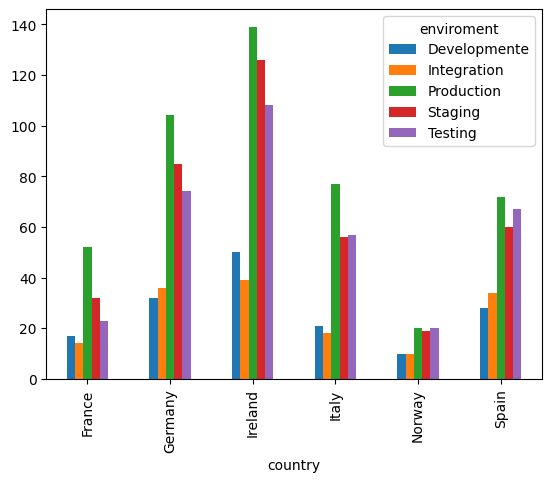

In [12]:
#Generar un único gráfico, agrupando para cada país (country) los entornos (enviroment).

# Agrupar los datos por país y entorno, y contar la cantidad de hosts en cada grupo
grouped_data = hosts_df.groupby(['country', 'enviroment'])['hostname'].count().unstack()

# Crea el gráfico de barras
grouped_data.plot(kind='bar', stacked=False);


<ipython-input-13-b98cc9bd5477>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a.set_text(f'{grouped_data.sum()[i]}') # Solo se muestra el número
<ipython-input-13-b98cc9bd5477>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='country', data=hosts_df, order=country_counts.index[::-1], palette='Blues_d', ax=ax)


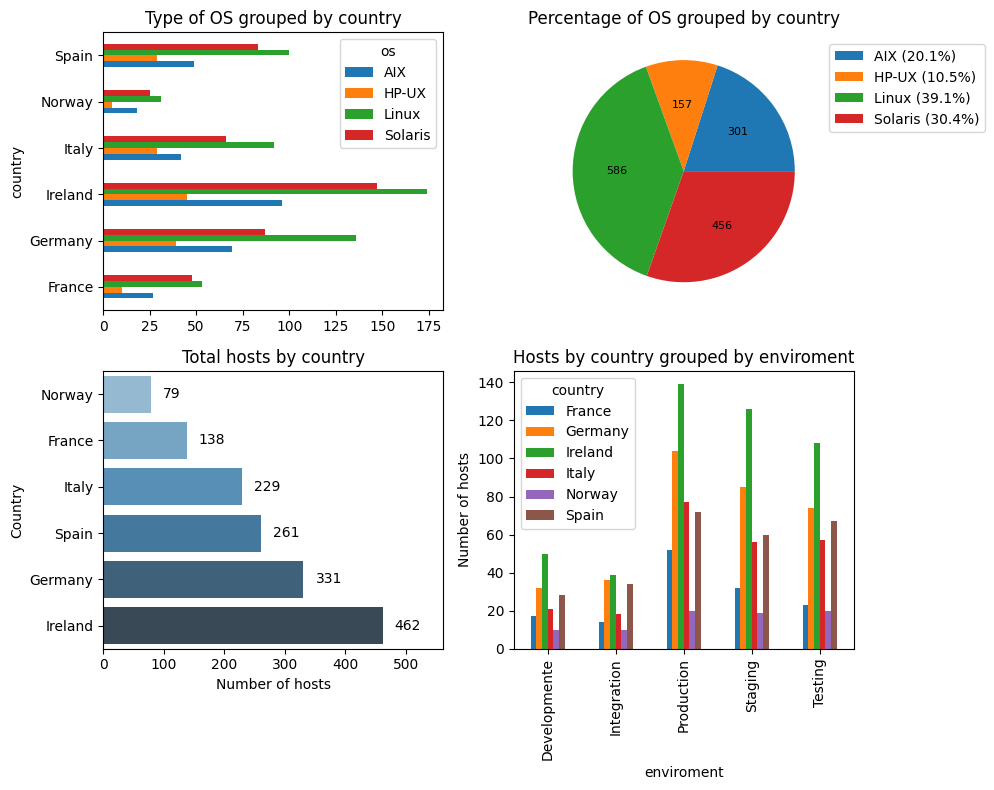

In [13]:
#Creamos la malla 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

#Gráfico posición (0,0)
grouped_data = hosts_df.groupby(['country', 'os'])['hostname'].count().unstack()
grouped_data.plot(kind='barh', stacked=False, ax=axes[0, 0])
axes[0, 0].set_title('Type of OS grouped by country')

# Gráfico posición (0,1)
wedges, texts, autotexts = axes[0, 1].pie(grouped_data.sum(), labels=None,
                                        autopct='', textprops={'fontsize': 8}) # autopct='' para no mostrar porcentajes dentro del gráfico

axes[0, 1].set_title('Percentage of OS grouped by country')

   # Mostrar el número de sistemas operativos al lado de cada sector
for i, a in enumerate(autotexts):
    a.set_text(f'{grouped_data.sum()[i]}') # Solo se muestra el número

   # Crear la leyenda con porcentajes
axes[0, 1].legend(wedges, [f'{l} ({s:.1f}%)' for l, s in zip(grouped_data.columns, grouped_data.sum() / grouped_data.sum().sum() * 100)],
                 loc='center left', bbox_to_anchor=(1, 0.8))

# Gráfico posición (1,0)
   # Calcula la cantidad total de hosts por país
country_counts = hosts_df['country'].value_counts()

   # Accede al objeto axes en la posición (1, 0)
ax = axes[1, 0]  # Cambia esto para la posición deseada

   # Crea el gráfico de barras horizontales en el objeto axes
sns.countplot(y='country', data=hosts_df, order=country_counts.index[::-1], palette='Blues_d', ax=ax)

   # Configura las etiquetas de los ejes y título en el objeto axes
ax.set_xlabel('Number of hosts')
ax.set_ylabel('Country')
ax.set_title('Total hosts by country')

   # Agrega el número total de hosts a la derecha de cada barra
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 20, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center')

   # Ajusta el límite máximo del eje x para agregar un margen
ax.set_xlim(0, country_counts.max() + 100)

# Gráfico posición (1,1)

grouped_data = hosts_df.groupby(['country', 'enviroment'])['hostname'].count().unstack(0)

# Crea el gráfico de barras en el objeto axes
grouped_data.plot(kind='bar', ax=axes[1, 1])

# Configura las etiquetas de los ejes y título en el objeto axes
axes[1, 1].set_ylabel('Number of hosts')
axes[1, 1].set_title('Hosts by country grouped by enviroment')

# Ajusta los márgenes y espacios entre los gráficos
fig.tight_layout()




